In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class ART1:
    def __init__(self, input_size, rho, vigilance):
        self.input_size = input_size
        self.rho = rho
        self.vigilance = vigilance
        self.b_ij = np.ones(input_size) / (input_size + 1)  # Initialize bottom-up weights
        self.t_ij = np.ones((1, input_size))  # Initialize top-down weights
        self.beta = 1  # Choice parameter

    def train(self, X): #prevent division by very small values, help with numerical stability.
        for x in X:
            bottom_up = x / (self.beta + np.sum(self.b_ij))
            top_down = self.t_ij / (self.beta + np.sum(self.t_ij))

            while True:
                net = np.dot(top_down, bottom_up)
                response = net / (self.beta + np.sum(top_down))

                # Check if the prototype is activated
                if np.max(response) > self.rho:
                    j = np.argmax(response)
                    self.t_ij[j, :] = self.t_ij[j, :] + self.vigilance * (bottom_up - self.t_ij[j, :])
                    self.b_ij = self.b_ij + self.vigilance * (bottom_up - self.b_ij)
                    break
                else:
                    # Create a new prototype if none is activated
                    self.t_ij = np.vstack([self.t_ij, bottom_up])
                    self.b_ij = np.ones(self.input_size) / (self.input_size + 1)
                    break

    def predict(self, X):
        clusters = []
        for x in X:
            bottom_up = x / (self.beta + np.sum(self.b_ij))
            top_down = self.t_ij / (self.beta + np.sum(self.t_ij))

            net = np.dot(top_down, bottom_up)
            response = net / (self.beta + np.sum(top_down))
            activated_cluster = np.argmax(response)
            clusters.append(activated_cluster)
        return clusters

    def get_num_clusters(self):
        return self.t_ij.shape[0]


Adjusted final number of clusters: 10


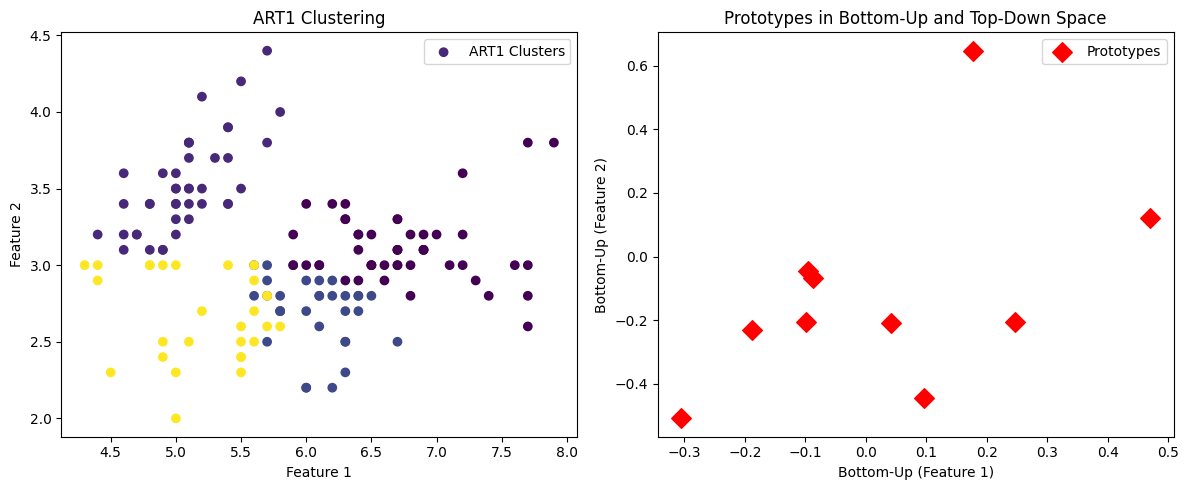

In [ ]:
# Step 1: Load Iris data
iris = datasets.load_iris()
data = iris.data
# Remove the labeled column (target)
unlabeled_data = data[:, :-1]

# Standardize the data
standardized_data = (unlabeled_data - np.mean(unlabeled_data, axis=0)) / np.std(unlabeled_data, axis=0)

# Instantiate ART1 network with adjusted vigilance
art_network = ART1(input_size=standardized_data.shape[1], rho=0.12, vigilance=0.2)

# Train the ART1 network
art_network.train(standardized_data)

# Predict clusters using the trained network
predicted_clusters = art_network.predict(standardized_data)

# Display the final number of clusters
num_clusters = art_network.get_num_clusters()
print(f"Adjusted final number of clusters: {num_clusters}")

# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot ART1 clusters
axes[0].scatter(data[:, 0], data[:, 1], c=predicted_clusters, cmap='viridis', label='ART1 Clusters')
axes[0].set_title('ART1 Clustering')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].legend()

# Plot prototypes in bottom-up and top-down space
axes[1].scatter(art_network.t_ij[:, 0], art_network.t_ij[:, 1], marker='D', s=100, color='red', label='Prototypes')
axes[1].set_title('Prototypes in Bottom-Up and Top-Down Space')
axes[1].set_xlabel('Bottom-Up (Feature 1)')
axes[1].set_ylabel('Bottom-Up (Feature 2)')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
mean_vector = np.mean(unlabeled_data, axis=0)
standardized_data = unlabeled_data - mean_vector


In [ ]:
# Step 2 : Compute the covariance matrix.
def compute_covariance_matrix(X):
    n = data.shape[0]
    mean_vec = np.mean(X, axis=0)
    centered_matrix = X - mean_vec
    covariance_matrix = (centered_matrix.T @ centered_matrix) / (n - 1)
    return covariance_matrix

covariance_matrix = compute_covariance_matrix(standardized_data)
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 0.68569351 -0.042434    1.27431544]
 [-0.042434    0.18997942 -0.32965638]
 [ 1.27431544 -0.32965638  3.11627785]]


In [ ]:
def pca (data,nofcomp):
  mean_vector = np.mean(unlabeled_data, axis=0)
  standardized_data = unlabeled_data - mean_vector
  covariance_matrix = compute_covariance_matrix(standardized_data)
  eigenvalues1, eigenvectors1 = np.linalg.eig(covariance_matrix)
  sorted_eigenVectors = eigenvectors1[:, eigenvalues1.argsort()[::-1]]
  principal_components = sorted_eigenVectors[:, :nofcomp]
  x_meaned = data - np.mean(data, axis=0)
  data_pca = np.dot(x_meaned, principal_components)

  mean_array = np.mean(data, axis=0)
  mean_reshaped = mean_array.values.reshape(1, -1)

    # Reconstruct data
  reconstructed = np.dot(data_pca, principal_components.T) + mean_reshaped

  return reconstructed

In [ ]:
def pca(data, nofcomp):
    mean_vector = np.mean(data, axis=0)
    standardized_data = data - mean_vector
    covariance_matrix = np.cov(standardized_data, rowvar=False)
    eigenvalues1, eigenvectors1 = np.linalg.eig(covariance_matrix)
    sorted_eigenVectors = eigenvectors1[:, eigenvalues1.argsort()[::-1]]
    principal_components = sorted_eigenVectors[:, :nofcomp]
    x_meaned = data - np.mean(data, axis=0)
    data_pca = np.dot(x_meaned, principal_components)

    mean_array = np.mean(data, axis=0)
    mean_reshaped = mean_array.reshape(1, -1)

    # Reconstruct data
    reconstructed = np.dot(data_pca, principal_components.T) + mean_reshaped

    return reconstructed

# Call pca function with unlabeled_data
pca_result = pca(unlabeled_data, 2)
print(pca_result)


[[5.07747862 3.52252543 1.41181782]
 [4.74561211 3.15441562 1.48101316]
 [4.69833908 3.20166122 1.30087155]
 [4.64444761 3.05554441 1.47667666]
 [5.06537121 3.53461705 1.36569726]
 [5.49062717 3.80935655 1.6524445 ]
 [4.75324013 3.24673235 1.31958912]
 [5.00052894 3.39947097 1.49972245]
 [4.42137361 2.87862255 1.38878446]
 [4.81262056 3.18739514 1.54585129]
 [5.35661026 3.74339753 1.52276823]
 [4.91147185 3.28850813 1.54150651]
 [4.68955446 3.11046538 1.45795495]
 [4.34009158 2.95990122 1.07896244]
 [5.64351696 4.15651115 1.28211256]
 [5.83243491 4.2675413  1.4305064 ]
 [5.39839433 3.90160596 1.30084256]
 [5.07747862 3.52252543 1.41181782]
 [5.61484988 3.88516542 1.74468148]
 [5.23238756 3.66758867 1.43053125]
 [5.27087596 3.52914724 1.76775626]
 [5.18843731 3.6115468  1.4535936 ]
 [4.74890777 3.45106548 0.92186247]
 [5.05875276 3.34125465 1.72164398]
 [4.98064648 3.21932108 1.80520797]
 [4.84778617 3.15224116 1.67987234]
 [5.02358715 3.37640862 1.58762293]
 [5.15659448 3.54341332 1.52

In [ ]:
def Q_Matrix_Func(X, max_components):
    tol = 0.0001
    prev_error = 1e9
    best_num_components = 1
    q_matrix = []

    # Data Normalization
    mean = np.mean(X, axis=0)
    normalized_X = X - mean

    covariance_matrix = np.cov(normalized_X, rowvar=False)

    eigenValues, eigenVectors = np.linalg.eig(covariance_matrix)

    sorted_eigenVectors = eigenVectors[:, eigenValues.argsort()[::-1]]


    mean_array = np.mean(X, axis=0)
    mean_reshaped = mean_array.reshape(1, -1)



    for num_components in range(1, max_components + 1):
        principal_components = sorted_eigenVectors[:, :num_components]

        X_pca = np.dot(normalized_X, principal_components)

        reconstructed = np.dot(X_pca, principal_components.T) + mean_reshaped

        error = np.mean(np.square(X - reconstructed))
        print(f'Error: {error}')
        print(f'The difference Error: {prev_error - error}')

        if np.any(prev_error - error > tol):
            best_num_components = num_components
            q_matrix = principal_components.copy()
        else:
            break

        prev_error = error

    return best_num_components, q_matrix


In [ ]:
best_num_components , q_matrix = Q_Matrix_Func(unlabeled_data , 100)


Error: 0.09960848470019429
The difference Error: 999999999.9003915
Error: 0.019685787710084827
The difference Error: 0.07992269699010945
Error: 6.419355616235983e-31
The difference Error: 0.019685787710084827
Error: 6.419355616235983e-31
The difference Error: 0.0


In [ ]:
# Instantiate ART1 network with adjusted vigilance
art_network = ART1(input_size=q_matrix.shape[1], rho=0.12, vigilance=0.6)

# Train the ART1 network
art_network.train(q_matrix)

# Predict clusters using the trained network
predicted_clusters = art_network.predict(q_matrix)


# Display the final number of clusters
num_clusters = art_network.get_num_clusters()
print(f"Adjusted final number of clusters: {num_clusters}")





Adjusted final number of clusters: 4
